In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This code for generating clean dataset from the stamps images with some rotation and some noise

from PIL import Image
import os
import random
import numpy as np
from scipy.ndimage import rotate
def rotate_image(image, degrees):
    image_array = np.array(image)
    black_pixels = (image_array[..., 0] == 0)
    rotated_image_array = rotate(image_array, degrees, reshape=False, mode='constant', cval=255)
    rotated_image_array[black_pixels] = 255
    rotated_image = Image.fromarray(rotated_image_array)
    return rotated_image

def remove_random_pixels(image,num):
    width, height = image.size
    num_pixels = 500 * num

    for _ in range(num_pixels):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        image.putpixel((x, y), 255)

    return image

def reverse_grayscale(image):
    return Image.eval(image, lambda x: 255 - x)

def generate_rotated_images(image_path, output_dir,index):
    path=image_path.__add__("/{}.png".format(index))
    original_image = Image.open(path).convert('L')
    original_image = original_image.resize((128, 128))

    for i in range(360):
        for num in range(3):
            rotated_image = rotate_image(original_image, i)
            rotated_image = remove_random_pixels(rotated_image,num)
            output_path = os.path.join(output_dir,f'stamp{index}_angle{i}_noise{num}.png')
            rotated_image.save(output_path)

    print('Rotated images with random pixel removal generated successfully.')

input_image_path = r"/content/drive/MyDrive/Final_Images"

output_directory = r"/content/clean_dataset"

for index in range(15):
    generate_rotated_images(input_image_path, output_directory,index)


Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.
Rotated images with random pixel removal generated successfully.


In [ ]:
# This code for generating dataset with random backgrounds with some rotation and some noise

import cv2
import numpy as np
import glob
import random
def remove_random_pixels(image, num, how_many=350):
    height, width = image.shape
    num_pixels = how_many * num

    for _ in range(num_pixels):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        image[y, x] = 255

    return image
def insert_stamps(stamps_folder, documents_folder, output_folder, threshold, scale_factor):
    stamp_paths = glob.glob(stamps_folder + "*.png")
    stamp_paths = sorted(stamp_paths, key=lambda x: (len(x), x))
    print(stamp_paths)

    document_paths = glob.glob(documents_folder + "*.jpg")

    for doc_num, document_path in enumerate(document_paths):
        document_img = cv2.imread(document_path, cv2.IMREAD_GRAYSCALE)

        doc_height, doc_width = document_img.shape

        for stamp_num, stamp_path in enumerate(stamp_paths):
            stamp_img = cv2.imread(stamp_path, cv2.IMREAD_GRAYSCALE)

            resized_stamp = cv2.resize(stamp_img, None, fx=scale_factor, fy=scale_factor)

            for angle in range(0, 349, 12):
                angle2 = (angle + random.randint(0,12)) % 360
                rotation_matrix = cv2.getRotationMatrix2D((resized_stamp.shape[1]//2, resized_stamp.shape[0]//2), angle2, 1)
                rotated_stamp = cv2.warpAffine(resized_stamp, rotation_matrix, (resized_stamp.shape[1], resized_stamp.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=(255))

                black_pixels = (rotated_stamp < threshold)

                for _ in range(20):
                    x = random.randint(0, doc_width - rotated_stamp.shape[1])
                    y = random.randint(0, doc_height - rotated_stamp.shape[0])

                    result_img = document_img.copy()

                    y_start, y_end = y, y + rotated_stamp.shape[0]
                    x_start, x_end = x, x + rotated_stamp.shape[1]

                    result_img[y_start:y_end, x_start:x_end][black_pixels] = 0

                    stamp_area = result_img[y_start:y_end, x_start:x_end]
                    for level_of_noise in range(2):
                        stamp_area=remove_random_pixels(stamp_area,level_of_noise,500)
                        extracted_name = output_folder + r"stamp{}_angle{}_doc{}_pos{}_noise{}.png".format(stamp_num,angle2,doc_num,_ ,level_of_noise)
                        cv2.imwrite(extracted_name, stamp_area)

stamps_folder = r"/content/drive/MyDrive/Final_Images/"
documents_folder = r"/content/drive/MyDrive/docs/"
output_folder = r"/content/background_dataset/"

threshold = 150

scale_factor = 0.3

insert_stamps(stamps_folder, documents_folder, output_folder, threshold, scale_factor)


['/content/drive/MyDrive/Final_Images/0.png', '/content/drive/MyDrive/Final_Images/1.png', '/content/drive/MyDrive/Final_Images/2.png', '/content/drive/MyDrive/Final_Images/3.png', '/content/drive/MyDrive/Final_Images/4.png', '/content/drive/MyDrive/Final_Images/5.png', '/content/drive/MyDrive/Final_Images/6.png', '/content/drive/MyDrive/Final_Images/7.png', '/content/drive/MyDrive/Final_Images/8.png', '/content/drive/MyDrive/Final_Images/9.png', '/content/drive/MyDrive/Final_Images/10.png', '/content/drive/MyDrive/Final_Images/11.png', '/content/drive/MyDrive/Final_Images/12.png', '/content/drive/MyDrive/Final_Images/13.png', '/content/drive/MyDrive/Final_Images/14.png']


In [ ]:
# same as the previous cell but different documents and parameters

import cv2
import numpy as np
import glob
import random
def remove_random_pixels(image, num, how_many=350):
    height, width = image.shape
    num_pixels = how_many * num

    for _ in range(num_pixels):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        image[y, x] = 255

    return image
def insert_stamps(stamps_folder, documents_folder, output_folder, threshold, scale_factor):
    stamp_paths = glob.glob(stamps_folder + "*.png")
    stamp_paths = sorted(stamp_paths, key=lambda x: (len(x), x))
    print(stamp_paths)


    document_paths = glob.glob(documents_folder + "*.jpg")
    doc_number=0

    for doc_num, document_path in enumerate(document_paths):
        document_img = cv2.imread(document_path, cv2.IMREAD_GRAYSCALE)
        document_img = np.where(document_img <50, 70, document_img)
        doc_height, doc_width = document_img.shape

        for stamp_num, stamp_path in enumerate(stamp_paths):
            stamp_img = cv2.imread(stamp_path, cv2.IMREAD_GRAYSCALE)
            stamp_img = np.where(stamp_img <50, 0, stamp_img)
            resized_stamp = cv2.resize(stamp_img, None, fx=scale_factor, fy=scale_factor)

            for q in range(3):
                angle = random.randint(0,359)
                rotation_matrix = cv2.getRotationMatrix2D((resized_stamp.shape[1]//2, resized_stamp.shape[0]//2), angle, 1)
                rotated_stamp = cv2.warpAffine(resized_stamp, rotation_matrix, (resized_stamp.shape[1], resized_stamp.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=(255))

                black_pixels = (rotated_stamp < threshold)

                for _ in range(10):
                    x = random.randint(0, doc_width - rotated_stamp.shape[1])
                    y = random.randint(0, doc_height - rotated_stamp.shape[0])

                    result_img = document_img.copy()

                    y_start, y_end = y, y + rotated_stamp.shape[0]
                    x_start, x_end = x, x + rotated_stamp.shape[1]

                    result_img[y_start:y_end, x_start:x_end][black_pixels] = 0

                    output_name = output_folder + r"stamp{}_doc{}_angle{}_pos{}.png".format(stamp_num, doc_num, angle , _)

                    doc_number+=1
                    cv2.imwrite(output_name, result_img)


stamps_folder = r"/content/drive/MyDrive/Final_Images/"
documents_folder = r"/content/drive/MyDrive/scans/"
output_folder = r"/content/50doc_dataset/"

threshold = 150

scale_factor = 0.3

insert_stamps(stamps_folder, documents_folder, output_folder, threshold, scale_factor)


['/content/drive/MyDrive/Final_Images/0.png', '/content/drive/MyDrive/Final_Images/1.png', '/content/drive/MyDrive/Final_Images/2.png', '/content/drive/MyDrive/Final_Images/3.png', '/content/drive/MyDrive/Final_Images/4.png', '/content/drive/MyDrive/Final_Images/5.png', '/content/drive/MyDrive/Final_Images/6.png', '/content/drive/MyDrive/Final_Images/7.png', '/content/drive/MyDrive/Final_Images/8.png', '/content/drive/MyDrive/Final_Images/9.png', '/content/drive/MyDrive/Final_Images/10.png', '/content/drive/MyDrive/Final_Images/11.png', '/content/drive/MyDrive/Final_Images/12.png', '/content/drive/MyDrive/Final_Images/13.png', '/content/drive/MyDrive/Final_Images/14.png']


In [ ]:

from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np


def imshow(img, showAxis=False, size=(20, 10)):
    plt.figure(figsize=size)
    if not showAxis:
        plt.axis("off")
    if len(img.shape) == 3:
        plt.imshow(img[:, :, ::-1])
    else:
        plt.imshow(img, cmap="gray")


def auto_canny(grayim, sigma=0.93):
    v = np.median(grayim)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(grayim, lower, upper)
    return edged


def detect(imgFile: str, output_dir=None) -> list:
    if output_dir is None:
        output_dir = Path("temp") / "detection"

    if not output_dir.exists():
        output_dir.mkdir(parents=True)

    img = cv2.imread(imgFile)
    cv2.imwrite(str(output_dir.joinpath("image.png")), img)

    origin_image = img.copy()
    cv2.imwrite(str(output_dir.joinpath("original_image.png")), origin_image)


    gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
    cv2.imwrite(str(output_dir.joinpath("gray.png")), gray)

    blur = cv2.bilateralFilter(gray.copy(), 10, 60, 20)
    cv2.imwrite(str(output_dir.joinpath("filter0.png")), blur)

    edged = cv2.Canny(blur, 150, 70)
    cv2.imwrite(str(output_dir.joinpath("edged.png")), blur)


    contours, _ = cv2.findContours(
        image=edged.copy(),
        mode=cv2.RETR_EXTERNAL,
        method=cv2.CHAIN_APPROX_NONE,
    )
    print(f"Total nr of contours found: {len(contours)}")

    topN = 10
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    sorted_contours = sorted_contours[:topN]
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 17000 and area > 50:
            filtered_contours.append(contour)

    filteredCircle = np.zeros((img.shape[:2]), dtype=np.uint8)
    cv2.drawContours(
        image=filteredCircle,
        contours=sorted_contours,
        contourIdx=-1,
        color=(255, 255, 255),
        thickness=cv2.FILLED,
    )

    cv2.imwrite(str(output_dir.joinpath("contours10.png")), filteredCircle)

    files = []

    for i, contour in enumerate(filtered_contours):
        mask = np.ones_like(origin_image, dtype=np.uint8) * 255

        cv2.drawContours(mask, [contour], 0, (255, 255, 255), -1)

        result = cv2.bitwise_and(origin_image, mask)

        x, y, w, h = cv2.boundingRect(contour)
        if w > 40 and h > 40:
            extracted_image = result[y: y + h, x: x + w]

            filepath = str(output_dir.joinpath("extacted{}.png".format(i)))
            files.append(filepath)
            cv2.imwrite(filepath, extracted_image)

    kernel = np.ones((3, 3), np.uint8)
    closedCircle = cv2.morphologyEx(
        filteredCircle, cv2.MORPH_CLOSE, kernel, iterations=1
    )
    cv2.imwrite(str(output_dir.joinpath("closedCircle.png")), closedCircle)

    return files

In [ ]:
import cv2
import numpy as np
import glob
import random
def remove_random_pixels(image, num, how_many=350):
    height, width = image.shape
    num_pixels = how_many * num

    for _ in range(num_pixels):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        image[y, x] = 255

    return image
def insert_stamps(stamps_folder, documents_folder, output_folder, threshold, scale_factor):
    stamp_paths = glob.glob(stamps_folder + "*.png")
    stamp_paths = sorted(stamp_paths, key=lambda x: (len(x), x))
    print(stamp_paths[0])

    document_paths = glob.glob(documents_folder + "*.jpg")
    doc_number=0

    for doc_num, document_path in enumerate(document_paths):
        document_img = cv2.imread(document_path, cv2.IMREAD_GRAYSCALE)
        document_img = np.where(document_img <50, 70, document_img)
        doc_height, doc_width = document_img.shape

        for stamp_num, stamp_path in enumerate(stamp_paths):
            stamp_img = cv2.imread(stamp_path, cv2.IMREAD_GRAYSCALE)
            stamp_img = np.where(stamp_img <50, 0, stamp_img)
            resized_stamp = cv2.resize(stamp_img, None, fx=scale_factor, fy=scale_factor)

            for angle in range(0, 361, 30):
                rotation_matrix = cv2.getRotationMatrix2D((resized_stamp.shape[1]//2, resized_stamp.shape[0]//2), angle, 1)
                rotated_stamp = cv2.warpAffine(resized_stamp, rotation_matrix, (resized_stamp.shape[1], resized_stamp.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=(255))

                black_pixels = (rotated_stamp < threshold)

                for _ in range(20):
                    x = random.randint(0, doc_width - rotated_stamp.shape[1])
                    y = random.randint(0, doc_height - rotated_stamp.shape[0])

                    result_img = document_img.copy()

                    y_start, y_end = y, y + rotated_stamp.shape[0]
                    x_start, x_end = x, x + rotated_stamp.shape[1]

                    result_img[y_start:y_end, x_start:x_end][black_pixels] = 0

                    output_name = output_folder + r"stamp{}_doc{}_angle{}_pos{}.png".format(stamp_num, doc_num, angle // 30, _)
                    doc_number+=1
                    cv2.imwrite(output_name, result_img)



stamps_folder = r"/content/drive/MyDrive/Final_Images/"
documents_folder = r"/content/drive/MyDrive/docs/"
output_folder = r"/content/docs_dataset/"

threshold = 150

scale_factor = 0.3

insert_stamps(stamps_folder, documents_folder, output_folder, threshold, scale_factor)


/content/drive/MyDrive/Final_Images/0.png


2


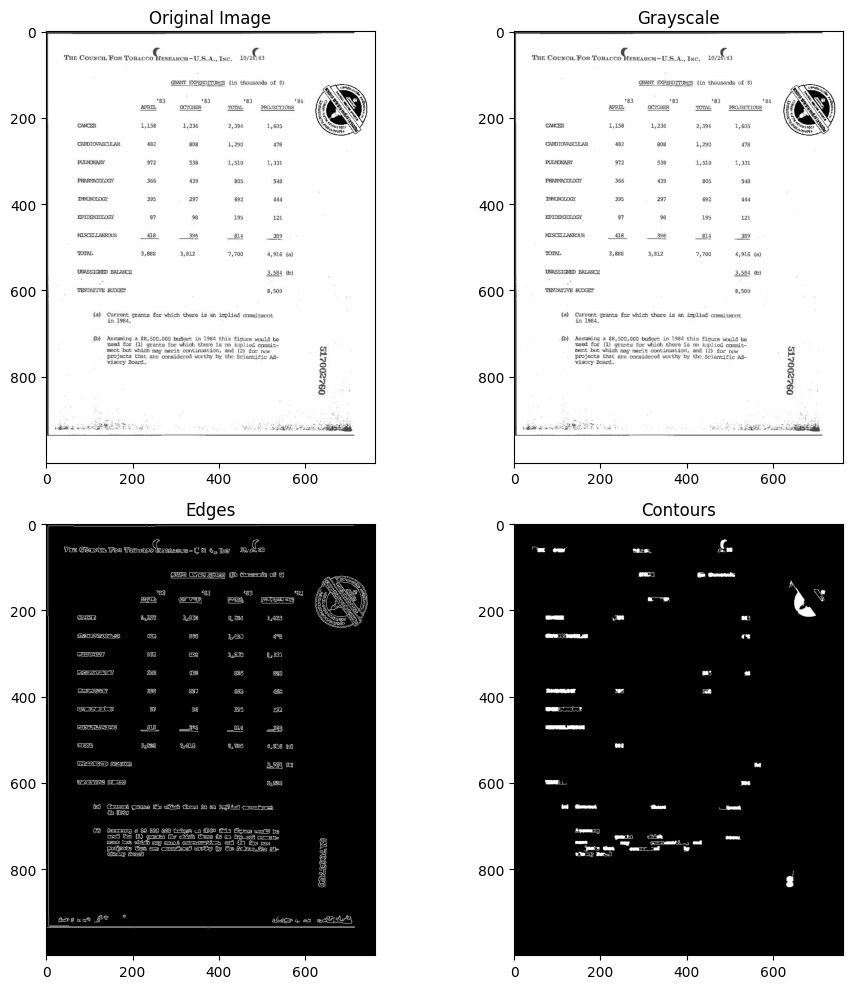

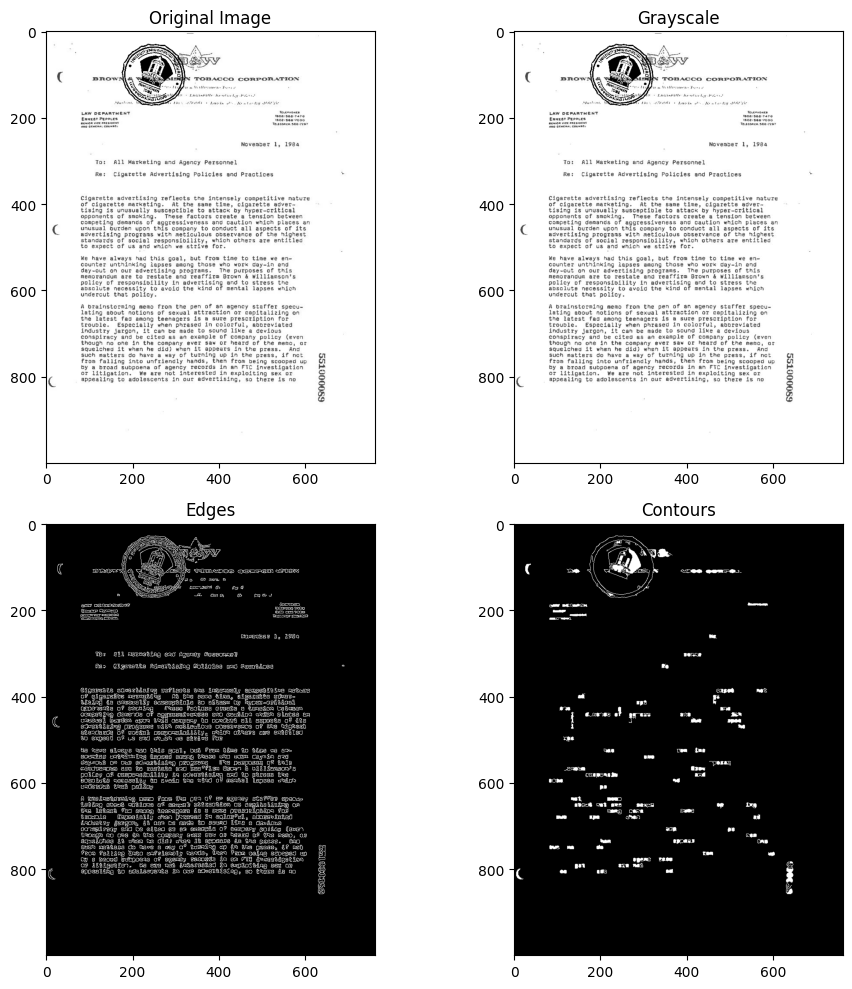

In [ ]:
# apply detection on the documents and plot

import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# path for the stamps images after detection
parent_directory = r"/content/test2/"
if not os.path.exists(parent_directory):
    os.makedirs(parent_directory)
n = 1

i_num=0
for i in range(1, n+1):
    # path for the documents with stamps to detect
    img_files =glob.glob( r"/content/test/*.png")
    print(len(img_files))
    for img_file in img_files:
        img = cv2.imread(img_file)
        origin_image = img.copy()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.bilateralFilter(gray, 8, 170, 50)
        edges = cv2.Canny(blur, 150, 70)

        contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        top_n = 10
        sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

        filtered_contours = [contour for contour in sorted_contours if 90 < cv2.contourArea(contour) < 17000]

        mask = np.zeros_like(origin_image, dtype=np.uint8)

        cv2.drawContours(mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

        files = []

        for j, contour in enumerate(filtered_contours):
            x, y, w, h = cv2.boundingRect(contour)

            if h > 90 and w > 90 and w<163 and h< 200:
                stamp = origin_image[y:y + h, x:x + w]

                filepath = parent_directory+"extacted{}.png".format(j)
                files.append(filepath)
                cv2.imwrite(filepath, stamp)
                i_num+=1

        plt.figure(figsize=(10, 10))
        plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
        plt.subplot(222), plt.imshow(gray, cmap="gray"), plt.title("Grayscale")
        plt.subplot(223), plt.imshow(edges, cmap="gray"), plt.title("Edges")
        plt.subplot(224), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)), plt.title("Contours")
        plt.tight_layout()
        plt.show()


In [ ]:
file_paths = []

In [ ]:
import os

first_path = 'test2'
file_paths = []
for root, dirs, files in os.walk(first_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

print(len(file_paths))

2


In [ ]:
# collecting data from the folders to train the model

import os

first_path = 'background_dataset'
second_path = 'clean_dataset'
thierd_path = 'detection_4_dataset'
forth_path = '50detection_dataset'
fifth_path = '50detection_2_dataset'
sixth_path = '50detection_3_dataset'
file_paths = []

for root, dirs, files in os.walk(first_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

for root, dirs, files in os.walk(second_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

for root, dirs, files in os.walk(thierd_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

for root, dirs, files in os.walk(forth_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

for root, dirs, files in os.walk(fifth_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

for root, dirs, files in os.walk(fifth_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

print(len(file_paths))

226962


In [ ]:
import random

random.shuffle(file_paths)
print(len(file_paths))

22430


In [ ]:
test_file_paths = file_paths[0:30000]
train_file_paths = file_paths[30000:]

In [ ]:
import random

random.shuffle(train_file_paths)
print(len(train_file_paths))

196962


In [ ]:
import random

random.shuffle(test_file_paths)
print(len(test_file_paths))

25000


In [ ]:
# add labels to the data for training

import os
import re

train_labels = []

for path in train_file_paths:
    match = re.search(r"stamp(\d+)_", path)
    if match:
        stamp_number = int(match.group(1))
        train_labels.append(stamp_number)

print(train_labels)

test_labels = []

for path in test_file_paths:
    match = re.search(r"stamp(\d+)_", path)
    if match:
        stamp_number = int(match.group(1))
        test_labels.append(stamp_number)

print(test_labels)

[]
[8, 0, 1, 3, 6, 3, 3, 2, 2, 13, 12, 0, 13, 13, 4, 3, 1, 2, 5, 12, 11, 7, 6, 7, 10, 8, 11, 8, 4, 3, 9, 8, 9, 8, 7, 2, 14, 6, 0, 10, 14, 8, 13, 12, 0, 0, 0, 11, 14, 11, 9, 3, 6, 1, 12, 13, 5, 3, 10, 12, 9, 5, 2, 3, 13, 6, 2, 2, 9, 10, 4, 9, 9, 9, 13, 2, 7, 12, 14, 3, 7, 3, 1, 9, 11, 11, 4, 6, 12, 0, 1, 5, 8, 12, 0, 0, 4, 12, 2, 4, 2, 2, 1, 7, 11, 1, 9, 0, 1, 7, 14, 6, 5, 5, 10, 10, 13, 8, 3, 5, 4, 11, 1, 4, 8, 0, 3, 10, 10, 1, 6, 4, 3, 4, 2, 4, 4, 5, 10, 3, 1, 0, 12, 14, 5, 7, 3, 11, 3, 4, 1, 13, 2, 3, 4, 3, 14, 13, 0, 1, 14, 7, 11, 2, 9, 8, 9, 10, 12, 11, 11, 6, 11, 11, 4, 4, 6, 10, 5, 7, 13, 4, 12, 7, 2, 13, 11, 1, 8, 0, 0, 1, 4, 3, 9, 6, 3, 10, 7, 11, 4, 4, 11, 0, 6, 6, 5, 8, 8, 9, 6, 0, 7, 2, 14, 14, 13, 5, 8, 8, 0, 11, 4, 3, 10, 3, 13, 12, 10, 0, 8, 2, 3, 7, 14, 1, 5, 1, 11, 11, 10, 10, 12, 0, 0, 8, 0, 2, 8, 2, 11, 3, 10, 9, 5, 0, 11, 9, 11, 8, 1, 2, 3, 14, 0, 6, 0, 6, 3, 9, 14, 14, 11, 3, 12, 11, 2, 6, 7, 7, 12, 11, 1, 5, 1, 9, 10, 7, 4, 1, 9, 10, 2, 4, 2, 7, 6, 4, 8, 0, 5, 8, 8

In [ ]:
# Convolutional Neural Network for image classification.
# Input images are 128x128 grayscale. The model consists of:
#   - Conv2D with 32 filters and ReLU activation.
#   - MaxPooling2D to downsample.
#   - Conv2D with 64 filters and ReLU activation.
#   - MaxPooling2D for downsampling.
#   - Flattening the feature maps.
#   - Dropout to prevent overfitting (25%).
#   - Dense layer with 128 neurons and ReLU activation.
#   - Dropout to prevent overfitting (50%).
#   - Dense output layer with 30 neurons and softmax activation.
# Compilation uses categorical crossentropy loss, Adam optimizer,
# and accuracy metric for training.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# preproces the images from the dataset before training

import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2


def apply_threshold(image):
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return binary

def invert_image(image):
    inverted = cv2.bitwise_not=(image)
    return inverted

def preprocess_image(image_path):
    img = cv2.imread(image_path, 0)
    img = apply_threshold(img)
    img = invert_image(img)
    img = img_to_array(img)
    img = img / 255.0
    img = cv2.resize(img,(128,128))
    return img


x_train = np.array([preprocess_image(path) for path in train_file_paths[0:3]])
x_test = np.array([preprocess_image(path) for path in test_file_paths[0:3]])

y_train = np.array(train_labels[0:3])
y_test = np.array(test_labels[0:3])

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
print(np.shape(x_test[0]))

0
0
3
3
(128, 128)


In [ ]:
# encoding the labels for categorizing

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()

label_encoder.fit(test_labels+train_labels)

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train = to_categorical(y_train_encoded, num_classes=30)
y_test = to_categorical(y_test_encoded, num_classes=30)

In [ ]:
# we train the model on 250k images from different documents
# with different angels, noises, random places in the docs.
# we have 3 type of images:
# - clean dataset:      stamps without backgrounds with different noise and rotation (16k image)
# - background dataset: stamps with random backgrounds from documents with different noise and rotation (100k image)
# - detection dataset:  stamps with random backgrounds from documents with different noise and rotation and extructed from detection code (134k images)


model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3839/3839 [==============================] - 452s 117ms/step - loss: 1.8600 - accuracy: 0.6276 - val_loss: 1.3077 - val_accuracy: 0.8229
Epoch 2/10
3839/3839 [==============================] - 450s 117ms/step - loss: 1.5285 - accuracy: 0.7150 - val_loss: 1.2211 - val_accuracy: 0.8416
Epoch 3/10
3839/3839 [==============================] - 452s 118ms/step - loss: 1.4648 - accuracy: 0.7320 - val_loss: 1.1623 - val_accuracy: 0.8471
Epoch 4/10
3839/3839 [==============================] - 448s 117ms/step - loss: 1.4280 - accuracy: 0.7387 - val_loss: 1.1348 - val_accuracy: 0.8440
Epoch 5/10
3839/3839 [==============================] - 445s 116ms/step - loss: 1.4102 - accuracy: 0.7447 - val_loss: 1.0993 - val_accuracy: 0.8654
Epoch 6/10
3839/3839 [==============================] - 444s 116ms/step - loss: 1.3933 - accuracy: 0.7492 - val_loss: 1.0954 - val_accuracy: 0.8670
Epoch 7/10
3839/3839 [==============================] - 446s 116ms/step - loss: 1.3850 - accuracy: 0.7530 - val_

In [ ]:
model.save("CNN_with_new_data_final6.h5")

In [ ]:
import os

main_path = 'test2'
file_paths = []

for root, dirs, files in os.walk(main_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

print(len(file_paths))

1


In [ ]:
import os
import re

labels = []

for path in file_paths:
    match = re.search(r"extacted(\d+)", path)
    if match:
        stamp_number = int(match.group(1))
        labels.append(stamp_number)

print(labels)


[0]


In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2


def apply_threshold(image):
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return binary

def invert_image(image):
    inverted = cv2.bitwise_not=(image)
    return inverted

def preprocess_image(image_path):
    img = cv2.imread(image_path, 0)
    img = apply_threshold(img)
    img = invert_image(img)
    img = img_to_array(img)
    img = img / 255.0
    img = cv2.resize(img,(128,128))
    return img


X = np.array([preprocess_image(path) for path in file_paths])
y = np.array(labels)

print(len(X))
print(len(y))


1
1


In [ ]:
y_pred = model.predict(X)
y_pred

1/1 [==============================] - 0s 27ms/step


array([[0.        , 0.        , 0.        , 0.9134164 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46206722, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8459437 , 0.        , 0.        ,
        0.        , 1.8611444 , 0.        , 0.9788903 , 0.        ,
        0.        , 0.82430255, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.9452299 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.16315258, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.73140347, 1.91

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X)
y_pred_labels = np.argmax(y_pred, axis=1)
print(len(y_pred))
print(y)
print(y_pred_labels)

score = accuracy_score(y, y_pred_labels)
print("Accuracy score:", score)

1/1 [==============================] - 0s 26ms/step
1
[11]
[11]
Accuracy score: 1.0


In [ ]:
model.pop()
embedding_model = Sequential(model.layers[:-1])

In [ ]:
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cosine

y_pred = embedding_model.predict(X)
for embedding in y_pred:
    similarity = 1 - cosine(y_pred[0], embedding)
    print(similarity)

1/1 [==============================] - 0s 103ms/step
1
0.922460675239563


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from keras.models import Sequential

model = load_model("/content/drive/MyDrive/CNN_with_new_data_final6.h5")
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from keras.models import Sequential

model = load_model("/content/drive/MyDrive/CNN_with_new_data_final6.h5")
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.pop()
embedding_model = Sequential(model.layers[:-1])

In [ ]:
embedding_model.save('CNN_with_new_data_final6_embeddings.h5')

In [ ]:
im = preprocess_image('test2/extacted0.png')
np.shape(im)

(128, 128)

In [ ]:
im = np.expand_dims(im, axis=2)
np.shape(im)

(128, 128, 1)

In [ ]:
predictions = model.predict(im)
predictions

1/1 [==============================] - 0s 33ms/step


array([[0.        , 0.        , 0.        , 0.9134164 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46206722, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8459437 , 0.        , 0.        ,
        0.        , 1.8611444 , 0.        , 0.9788903 , 0.        ,
        0.        , 0.82430255, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.9452299 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.16315258, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.73140347, 1.91